# Logistička regresija

**"A statistical model that uses a logistic function to model a binary dependent variable"**

# Pregled
* Binarna klasifikacija
* Logistička regresija
* Evaluacija modela
* Multinomijalna (multiclass) klasifikacija
  * One-vs-all
  * Softmax

# Binarna klasifikacija

U problemima **klasifikacije** izlazni podaci su diskretnog tipa i nazivamo ih **klase**. Dakle, treba naučiti funkciju koja ispravno klasifikuje ulazne podatke (sa proizvoljno mnogo feature-a) u neku od tih klasa.

Ako je klasifikacija **binarna** postoji tačno dve klase, koje se često označavaju sa 0 (negativna klasa) i 1 (pozitivna klasa).



# Logistička regresija

* **Logistička regresija** (Logistic Regression) je metod za rešavanje problema binarne klasifikacije
* **Hipoteza (model)**: $h_\theta(X)=S(X\Theta + bias)$
  * $S$ je **logistička funkcija** (sigmoid): $S(x) = \frac{1}{1+e^{-x}}$
  * Logistička funkcija mapira realne vrednosti u interval od 0 do 1
  * Izlaz ove funkcije ćemo tretirati kao **verovatnoću da uneti primer pripada klasi 1**
  * Sada možemo definisati **granicu odluke** kao vrednost iznad koje ćemo primere tretirati kao "pozitivne"
  * $h_\theta(X) \ge 0.5 \implies klasa = 1$
  * $h_\theta(X) < 0.5 \implies klasa = 0$
* Sada naša stara loss funkcija nema mnogo smisla, pa koristimo **Cross Entropy Loss** (Log Loss):
  * $J(\theta) = \frac{1}{m} \sum\limits_{i=1}^{m} Cost(h_\Theta(x^{(i)}), y^{(i)})$
  * $Cost(h_\Theta(x), y) = -\log(h_\Theta(x))$ za $y=1$
  * $Cost(h_\Theta(x), y) = -\log(1 - h_\Theta(x))$ za $y = 0$
  * Kao jedan izraz, da bismo zaobišli potrebu za grananjem, $Cost$ se može zapisati ovako (uvek je tačno jedan sabirak jednak nuli):
    * $Cost(h_\Theta(x), y) = -y~log(h_\Theta(x))-(1-y)\log(1-h_\Theta(x))$ 
* Za optimizaciju i trening koristimo iste procedure
* [Više o logističkoj regresiji](https://mcerovic.github.io/notes/LogisticRegression/index.html)

## Primer

Dat je skup podataka **logreg_data.csv** sa 200 trening primera i 2 ulazna feature-a. Za svaki primer data je klasa kom pripada (0 ili 1).

Istreniraćemo logističku regresiju da za nepoznate primere vrši klasifikaciju.


Epoch: 10/100| Avg loss: 0.17923
Epoch: 20/100| Avg loss: 0.15621
Epoch: 30/100| Avg loss: 0.14875
Epoch: 40/100| Avg loss: 0.14529
Epoch: 50/100| Avg loss: 0.14341
Epoch: 60/100| Avg loss: 0.14229
Epoch: 70/100| Avg loss: 0.14159
Epoch: 80/100| Avg loss: 0.14113
Epoch: 90/100| Avg loss: 0.14082
Epoch: 100/100| Avg loss: 0.14060
w =  [3.4585118 2.805336 ] bias =  -0.054843385


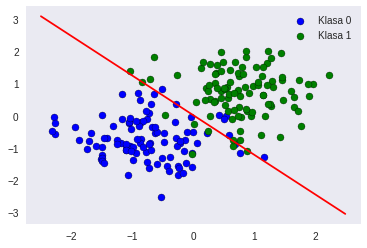

In [22]:
%matplotlib inline
import tensorflow as tf 
import matplotlib.pyplot as plt
import numpy as np

tf.reset_default_graph()

# Korak 1: Učitavanje i obrada podataka.
filename = 'logreg_data.csv'
all_data = np.loadtxt(filename, delimiter=',')
data = dict()
data['x'] = all_data[:, :2]
data['y'] = all_data[:, 2]
nb_features = 2

# Nasumično mešanje.
nb_samples = data['x'].shape[0]
indices = np.random.permutation(nb_samples)
data['x'] = data['x'][indices]
data['y'] = data['y'][indices]

# Normalizacija. Ne normalizujemo y!
data['x'] = (data['x'] - np.mean(data['x'], axis=0)) / np.std(data['x'], axis=0)
# data['y'] = (data['y'] - np.mean(data['y'])) / np.std(data['y'])

# Iscrtavanje.
idxs = data['y'] == 0.0
plt.scatter(data['x'][idxs, 0], data['x'][idxs, 1], c='b', 
            edgecolors='k', label='Klasa 0')
plt.scatter(data['x'][~idxs, 0], data['x'][~idxs, 1], c='g', 
            edgecolors='k', label='Klasa 1')
plt.legend()

# Korak 2: Model.
X = tf.placeholder(shape=(None, nb_features), dtype=tf.float32)
Y = tf.placeholder(shape=(None), dtype=tf.float32)
w = tf.Variable(tf.zeros(nb_features))
bias = tf.Variable(0.0)

w_col = tf.reshape(w, (nb_features, 1))
hyp = tf.sigmoid(tf.add(tf.matmul(X, w_col), bias))

# Korak 3: Funkcija troška i optimizacija.
Y_col = tf.reshape(Y, (-1, 1))
loss = tf.reduce_mean(-tf.multiply(Y, tf.log(hyp)) 
                      -tf.multiply(1.0-Y, tf.log(1.0-hyp)))

# Prelazimo na AdamOptimizer jer se prost GradientDescent lose snalazi sa 
# slozenijim funkcijama.
opt_op = tf.train.GradientDescentOptimizer(0.01).minimize(loss)

# Korak 4: Trening.
with tf.Session() as sess:
  sess.run(tf.global_variables_initializer())
  
  # Izvršavamo 100 epoha treninga.
  nb_epochs = 100
  for epoch in range(nb_epochs):
    epoch_loss = 0
    for sample in range(nb_samples):
      feed = {X: data['x'][sample].reshape((1, nb_features)), 
              Y: data['y'][sample]}
      _, curr_loss = sess.run([opt_op, loss], feed_dict=feed)
      epoch_loss += curr_loss
        
    # U svakoj desetoj epohi ispisujemo prosečan loss.
    epoch_loss /= nb_samples
    if (epoch + 1) % 10 == 0:
      print('Epoch: {}/{}| Avg loss: {:.5f}'.format(epoch+1, nb_epochs, 
                                              epoch_loss))
 
  # Ispisujemo i plotujemo finalnu vrednost parametara.
  w_val = sess.run(w)
  bias_val = sess.run(bias)
  print('w = ', w_val, 'bias = ', bias_val)
  
  # OBJASNI OVU MAGIJU + dodaj evaluaciju verovatnoce
  xs = np.linspace(-2.5, 2.5, 10)
  ys = (-bias_val - w_val[0]*xs) / w_val[1]
  plt.plot(xs.tolist(), ys.tolist(), color='r')
  plt.grid(False)
  plt.show()

#Evaluacija modela

In [0]:
#TODO

#Multinomijalna (multiclass) klasifikacija

In [0]:
#TODO